In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


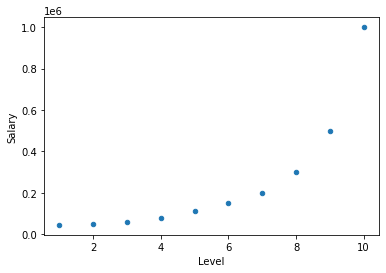

In [47]:
df.plot(kind='scatter',x='Level',y='Salary')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
X = df[['Level']]
y = df['Salary']

In [ ]:
for i in range(2,16):
    p = PolynomialFeatures(i)
    X_new = p.fit_transform(X)
    reg = LinearRegression()
    reg.fit(X_new, y)
    ypred = reg.predict(X_new)
    acc = f"acc:{reg.score(X_new,y) * 100}"
    mae = f"mae:{mean_absolute_error(y,ypred)}"
    plt.title(f"degree: {i}")
    plt.plot(X,y,'ro',X,ypred,':')
    plt.text(1,.8e6,f"{acc}\n{mae}")
    plt.show()

### we select degree 5

In [44]:
reg = LinearRegression()
pf = PolynomialFeatures(5)
X_opt = pf.fit_transform(X)
reg.fit(X_opt,y)


LinearRegression()

In [49]:
pf.transform([[5.5]])

array([[1.00000000e+00, 5.50000000e+00, 3.02500000e+01, 1.66375000e+02,
        9.15062500e+02, 5.03284375e+03]])

In [51]:
reg.predict(pf.transform([[11]]))

array([2006333.33332935])

In [59]:
import seaborn as sns

In [66]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [70]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='carat', ylabel='price'>

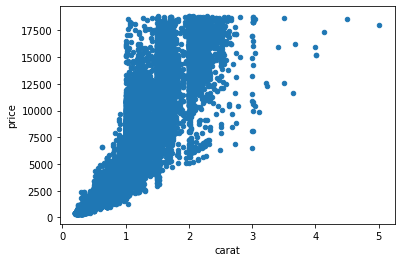

In [74]:
diamonds.plot(kind='scatter',x='carat',y='price')

In [75]:
pf= PolynomialFeatures(15)
X_new = pf.fit_transform(diamonds[['carat']])